In [1]:
# %load /Users/facai/Study/book_notes/preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
#sns.set(font='SimHei', font_scale=2.5)
#plt.rcParams['axes.grid'] = False

import numpy as np

import pandas as pd
#pd.options.display.max_rows = 20

import logging
logging.basicConfig()
logger = logging.getLogger()

from IPython.display import Image

import enum

Chapter 4 Dynamic Programming
================

limition:
+ assumption: a perfect model
+ great computational expense 

### 4.1 Plicy Evaluation (Prediction)

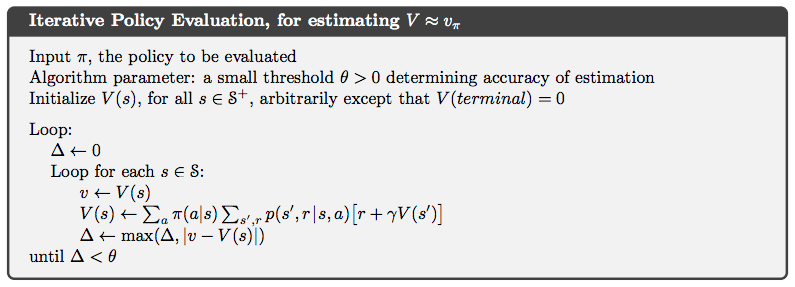

In [2]:
Image('./res/iterative_policy_evaluation.png')

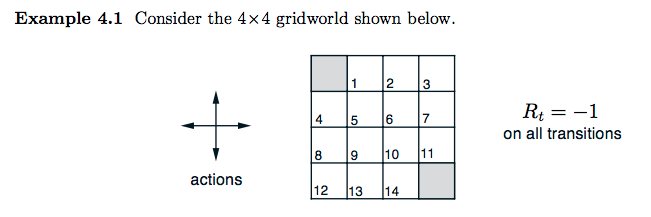

In [3]:
Image('./res/ex4_1.png')

In [4]:
class Action(enum.Enum):
    EAST = enum.auto()
    WEST = enum.auto()
    SOUTH = enum.auto()
    NORTH = enum.auto()
    
    @staticmethod
    def move(x, y, action):
        if action == Action.EAST:
            return x, y - 1
        elif action == Action.WEST:
            return x, y + 1
        elif action == Action.SOUTH:
            return x + 1, y
        elif action == Action.NORTH:
            return x - 1, y
            
            
class GridWorld(object):
    def move(self, s, action):
        if s == 0 or s == 15:
            return s, 0
        elif 0 < s < 15:
            x = s // 4
            y = s % 4
            x1, y1 = Action.move(x, y, action)
            if 0 <= x1 < 4 and 0 <= y1 < 4:
                s1 = x1 * 4 + y1
                return s1, -1
            else:
                return s, -1
        else:
            raise ValueError('s {} must be in [0, 15]'.format(s))
        
        
class RandomPolicy(object):
    
    def __init__(self, grid_world):
        self._grid_world = grid_world
        
        self._v = np.zeros((4, 4))
        self._v_flatten = self._v.ravel()
        
        self._delta = 0
    
    def iterate(self):
        v = self._v.copy()
        
        for s in range(0, 16):
            self.update_value(s)
        
        self._delta = max(self._delta, np.sum(np.abs(v - self._v)))
        
        return self._v.copy()
    
    def get_pi(self, s):
        return [(0.25, (s, a)) for a in [Action.EAST,
                                         Action.WEST,
                                         Action.SOUTH,
                                         Action.NORTH]]
    
    def update_value(self, s):
        # V(s) = \sum_a \pi(a | s) \sum 1 * (r + 1 * V(s1))
        vs = []
        for (prob, (s, a)) in self.get_pi(s):
            s1, r = self._grid_world.move(s, a)
            vs.append(prob * (r + self._v_flatten[s1]))
        logger.debug('vs: {}'.format(vs))
        self._v_flatten[s] = np.sum(vs)

In [5]:
# logger.setLevel(logging.DEBUG)
r = RandomPolicy(GridWorld())
for _ in range(100):
    r.iterate()
pd.DataFrame(np.round(r.iterate()))

,0,1,2,3
0,0.0,-14.0,-20.0,-22.0
1,-14.0,-18.0,-20.0,-20.0
2,-20.0,-20.0,-18.0,-14.0
3,-22.0,-20.0,-14.0,0.0


### 4.2 Policy Improvement

\begin{align*}
    q_\pi(s, a) = \sum_{s', r} p(s', r \mid s, a) \left [ r + \gamma v_\pi(s') \right ]
\end{align*}

policy improvement theorem: For all $s \in \mathcal{S}$, $q_\pi(s, \pi'(s)) \geq v_\pi(s)$, then $v_{\pi'}(s) \geq v_\pi(s)$.

=> new greedy policy: $\pi'(s) = \operatorname{arg \, max}_a q_\pi(s, a)$, policy imporvement.

If there are ties in policy improvement step, each maximizing action can be given a portion of the probability of being selected in the new greedy policy.

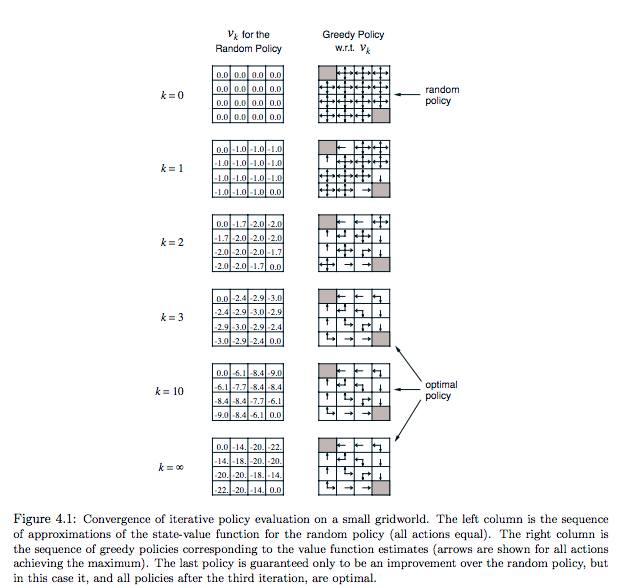

In [6]:
Image('./res/fig4_1.png')

### 4.3 Policy Iteration

policy iteration:

\begin{align*}
    \pi_0 \overset{E}{\longrightarrow} v_{\pi_0} \overset{I}{\longrightarrow} \pi_1 \overset{E}{\longrightarrow} v_{\pi_1} \overset{I}{\longrightarrow} \pi_2 \overset{E}{\longrightarrow} \cdots \overset{I}{\longrightarrow} \pi_\ast \overset{E}{\longrightarrow} v_{\pi_\ast} 
\end{align*}

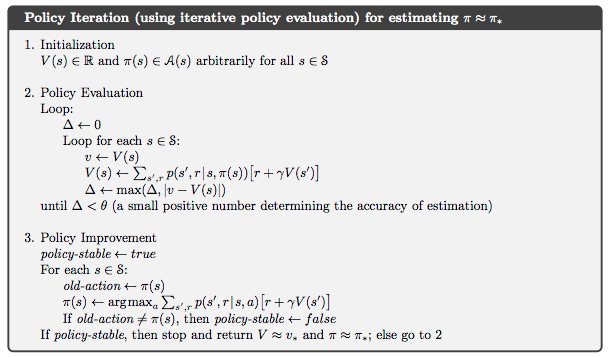

In [7]:
Image('./res/policy_iteration.png')

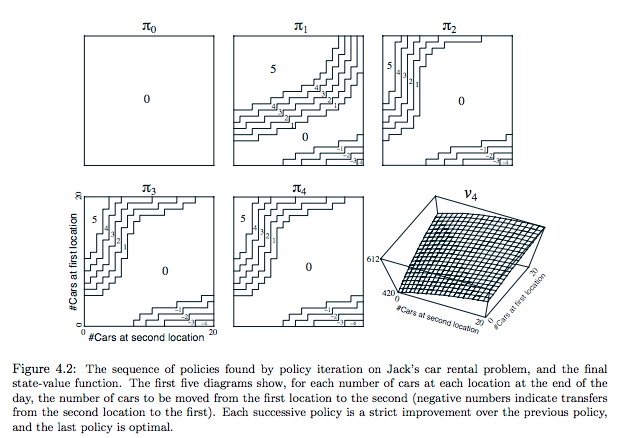

In [8]:
Image('./res/fig4_2.png')

### 4.4 Value Iteration

truncate policy evaluation

=> value iteration: policy evaluation is stopped after just one sweep (one update of each state).

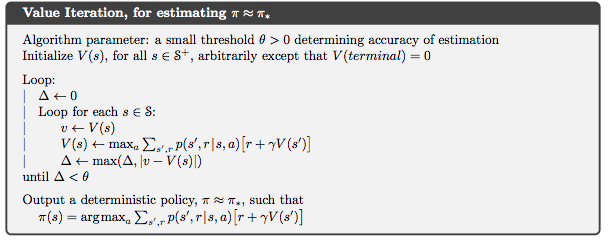

In [9]:
Image('./res/value_iteration.png')

### 4.5 Asynchronouse Dynamic Programming

avoiding sweeps

focus the DP algorithm's update onto parts of the state set that are most relevant to the agent.

### 4.6 Generalized Policy Iteration

Almost all reinforcement learning methods are well described as GPI:

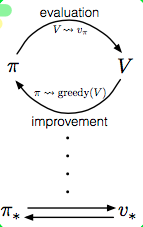

In [10]:
Image('./res/gpi.png')

### 4.7 Efficiency of Dynamic Programming

DP: polynomial in the number of states and actions.